In [2]:
import mxnet as mx
import numpy as np

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
C:\ProgramData\Anaconda3\lib\site-packages\h5py\tests\old\test_attrs_data.py:251: DeprecationWarning: invalid escape sequence \H
  s = b"Hello\x00\Hello"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\func_inspect.py:53: DeprecationWarning: invalid escape sequence \<
  '\<doctest (.*\.rst)\[(.*)\]\>', source_file).groups()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\_memory_helpers.py:10: DeprecationWarning: invalid escape sequence \s
  cookie_re = re.compile("coding[:=]\s*([-\w.]+)")


In [3]:
# 创建训练集iter
train_iter = mx.io.ImageRecordIter(
    path_imgrec="image_data_train.rec", #rec文件路径
    data_shape=(3,200,200),         #期望的数据形状，注意：
                                  #即使图片不是这个尺寸，也可以在此被自动转换
    batch_size=50,              #每次传入1000条数据
)

# 创建内部测试集iter
val_iter = mx.io.ImageRecordIter(
    path_imgrec="image_data_test.rec",
    data_shape=(3,200,200),
    batch_size=50,              #必须与上面的batch_size相等，否则不能对应
)

DataBatch: data shapes: [(32, 3, 200, 200)] label shapes: [(32,)]


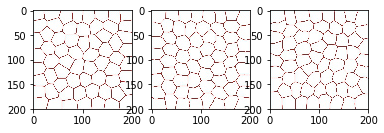

In [15]:
batch = train_iter.next() #导入一个样本batch
print(batch) 

data = batch.data[0]

from matplotlib import pyplot as plt
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(data[i].asnumpy().astype(np.uint8).transpose((1,2,0)))
plt.show()

In [4]:
def get_lenet():

    data = mx.symbol.Variable('data')

    # first conv
    conv1 = mx.symbol.Convolution(data=data, kernel=(5,5), num_filter=20)
    tanh1 = mx.symbol.Activation(data=conv1, act_type="tanh")
    pool1 = mx.symbol.Pooling(data=tanh1, pool_type="max",

                              kernel=(2,2), stride=(2,2))
    # second conv
    conv2 = mx.symbol.Convolution(data=pool1, kernel=(4,4), num_filter=50)
    tanh2 = mx.symbol.Activation(data=conv2, act_type="tanh")
    pool2 = mx.symbol.Pooling(data=tanh2, pool_type="max",

                              kernel=(2,2), stride=(2,2))

    # first fullc
    flatten = mx.symbol.Flatten(data=pool2)
    fc1 = mx.symbol.FullyConnected(data=flatten, num_hidden=500)
    tanh4 = mx.symbol.Activation(data=fc1, act_type="tanh")


    # second fullc
    fc2 = mx.symbol.FullyConnected(data=tanh4, num_hidden=2)

    # loss
    lenet = mx.symbol.SoftmaxOutput(data=fc2, name='softmax')
    return lenet

In [5]:
import logging
batch_size=50
logging.getLogger().setLevel(logging.DEBUG)  #设置logger输出级别
                                             #删除此句则无法输出训练状态

model = mx.model.FeedForward( 
    ctx = mx.gpu(0),                     #使用gpu，若无gpu写mx.cpu()
    symbol = get_lenet(),                #使用刚拿来的lenet
    num_epoch = 50,                      #设置运行epoch数
                                         #全体样本遍历一次是一个epoch
    learning_rate = 0.01,                #学习率，可调
)

model.fit(
    X = train_iter,                      #训练集
    eval_data = val_iter,                #验证集
    batch_end_callback = mx.callback.Speedometer(batch_size, 200)
                                         #监视训练状态
                                         #每200个iteration后输出一次
)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: mxnet.model.FeedForward has been deprecated. Please use mxnet.mod.Module instead.
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\mxnet\model.py:573: DeprecationWarning: Calling initializer with init(str, NDArray) has been deprecated.please use init(mx.init.InitDesc(...), NDArray) instead.
  self.initializer(k, v)
INFO:root:Start training with [gpu(0)]
INFO:root:Epoch[0] Resetting Data Iterator
INFO:root:Epoch[0] Time cost=6.357
INFO:root:Epoch[0] Validation-accuracy=0.264000
INFO:root:Epoch[1] Resetting Data Iterator
INFO:root:Epoch[1] Time cost=3.038
INFO:root:Epoch[1] Validation-accuracy=0.264000
INFO:root:Epoch[2] Resetting Data Iterator
INFO:root:Epoch[2] Time cost=3.169
INFO:root:Epoch[2] Validation-accuracy=0.272000
INFO:root:Epoch[3] Resetting Data Iterator
INFO:root:Epoch[3] Time cost=3.038
INFO:root:Epoch[3] Validation-accuracy=0.256000

KeyboardInterrupt: 